## Work
請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

train, test = keras.datasets.cifar10.load_data()

## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

Using TensorFlow backend.


170500096/170498071 [==============================] - 21s 0us/step


In [0]:
from keras.layers import BatchNormalization
from keras.regularizers import l1, l2, l1_l2
from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
            x = Dropout(drop_ratio)(x)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [18]:
LEARNING_RATE = 1e-3
EPOCHS = 50
l1_ratio = 0.01
Batch_Size = 32
MOMENTUM = 0.95
drop_ratio = 0.25

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
__________

In [19]:
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model.fit(x_train, y_train,
          epochs=EPOCHS,
          batch_size=Batch_Size,
          validation_data=(x_test, y_test),
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 57s 1ms/step - loss: 32.8928 - acc: 0.2013 - val_loss: 3.8740 - val_acc: 0.1813
Epoch 2/50
50000/50000 [==============================] - 55s 1ms/step - loss: 3.0411 - acc: 0.1798 - val_loss: 4.2873 - val_acc: 0.1106
Epoch 3/50
50000/50000 [==============================] - 55s 1ms/step - loss: 2.7753 - acc: 0.1757 - val_loss: 2.8541 - val_acc: 0.1450
Epoch 4/50
50000/50000 [==============================] - 55s 1ms/step - loss: 2.6445 - acc: 0.1571 - val_loss: 2.4375 - val_acc: 0.1804
Epoch 5/50
50000/50000 [==============================] - 55s 1ms/step - loss: 2.6039 - acc: 0.1539 - val_loss: 3.4236 - val_acc: 0.1663
Epoch 6/50
50000/50000 [==============================] - 54s 1ms/step - loss: 2.7058 - acc: 0.1568 - val_loss: 2.6835 - val_acc: 0.1021
Epoch 7/50
50000/50000 [==============================] - 54s 1ms/step - loss: 2.7769 - acc: 0.1367 - val_loss: 2.5086 - val_ac

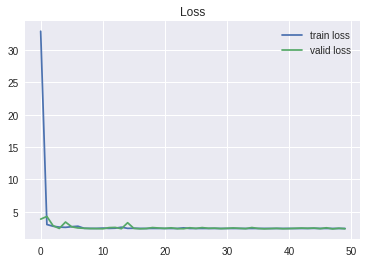

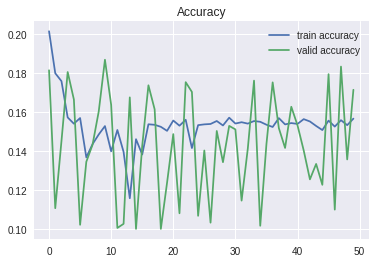

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

# 嘗試不同參數

In [0]:
from keras.layers import BatchNormalization
from keras.regularizers import l1, l2, l1_l2
from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
            x = Dropout(drop_ratio)(x)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [22]:
LEARNING_RATE = 1e-3
EPOCHS = 50
l1_ratio = 0.0001
Batch_Size = 256
MOMENTUM = 0.95
drop_ratio = 0.25

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
__________

In [23]:
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model.fit(x_train, y_train,
          epochs=EPOCHS,
          batch_size=Batch_Size,
          validation_data=(x_test, y_test),
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 17s 346us/step - loss: 6.1181 - acc: 0.2778 - val_loss: 5.7558 - val_acc: 0.3491
Epoch 2/50
50000/50000 [==============================] - 15s 294us/step - loss: 5.6867 - acc: 0.3701 - val_loss: 5.5625 - val_acc: 0.3956
Epoch 3/50
50000/50000 [==============================] - 15s 295us/step - loss: 5.5261 - acc: 0.3999 - val_loss: 5.4311 - val_acc: 0.4222
Epoch 4/50
50000/50000 [==============================] - 15s 296us/step - loss: 5.3913 - acc: 0.4247 - val_loss: 5.3392 - val_acc: 0.4341
Epoch 5/50
50000/50000 [==============================] - 15s 294us/step - loss: 5.2863 - acc: 0.4400 - val_loss: 5.2155 - val_acc: 0.4554
Epoch 6/50
50000/50000 [==============================] - 15s 293us/step - loss: 5.1937 - acc: 0.4518 - val_loss: 5.1206 - val_acc: 0.4641
Epoch 7/50
50000/50000 [==============================] - 15s 293us/step - loss: 5.1070 - acc: 0.4578 - val_loss: 5.

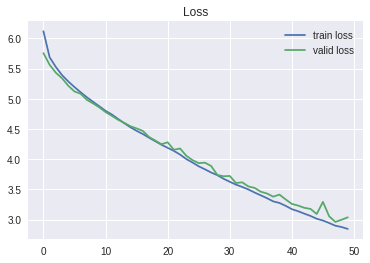

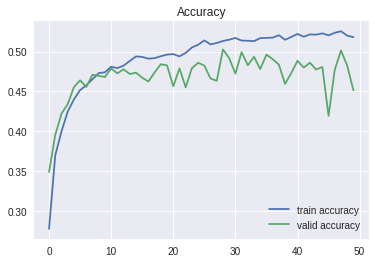

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()